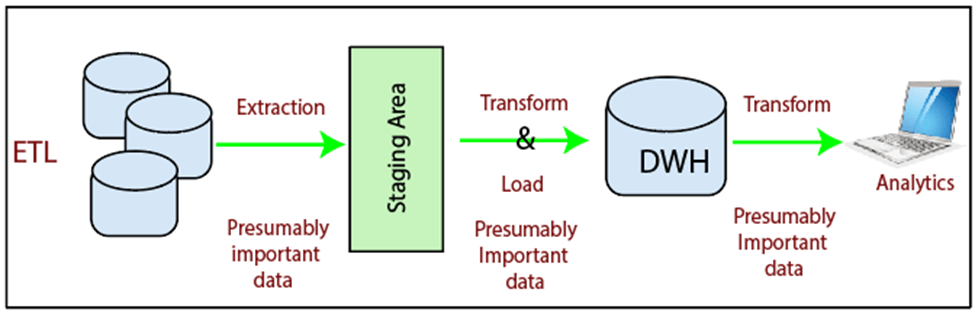

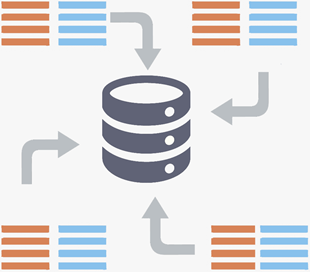

In [1]:
from pyspark.sql import SparkSession

In [2]:
spark = SparkSession.builder.appName("pySpDW1").getOrCreate()

### Source Tables
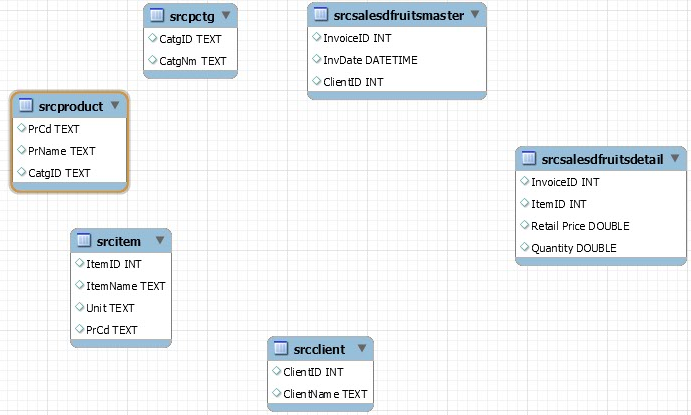

In [3]:
dfCtg = spark.read.csv('D://Teach//DW//Assign//SrcPCtg.csv', inferSchema=True, header = True)
print("Rows", dfCtg.count(),";\t Columns", len(dfCtg.columns))
dfCtg.show(5)

Rows 3 ;	 Columns 2
+------+----------+
|CatgID|    CatgNm|
+------+----------+
|   K01|KictenItem|
|   K02| KictenEat|
|   D01|  DryFruit|
+------+----------+



In [4]:
dfPrd = spark.read.csv('D://Teach//DW//Assign//SrcProduct.csv', inferSchema=True, header = True)
print("Rows", dfPrd.count(),";\t Columns", len(dfPrd.columns))
dfPrd.show(5)

Rows 96 ;	 Columns 3
+----+--------+------+
|PrCd|  PrName|CatgID|
+----+--------+------+
| A02|  Akhrot|   D01|
| A06|  Anjeer|   D01|
| B02|   Badam|   D01|
| B06|    Beej|   D01|
| C17|Chilgoza|   D01|
+----+--------+------+
only showing top 5 rows



In [5]:
SrcItem = spark.read.csv('D://Teach//DW//Assign//SrcItem.csv', inferSchema=True, header = True)
print("Rows", SrcItem.count(),";\t Columns", len(SrcItem.columns))
SrcItem.show(5)

Rows 746 ;	 Columns 4
+------+-------------+----+----+
|ItemID|     ItemName|Unit|PrCd|
+------+-------------+----+----+
| 31751|akhrot 200 gm|  gm| A02|
| 31752|akhrot 100 gm|  gm| A02|
| 31753| akhrot 50 gm|  gm| A02|
| 31798|akhrot 500 gm|  gm| A02|
| 31863|akhrot 400 gm|  gm| A02|
+------+-------------+----+----+
only showing top 5 rows



In [6]:
SrcItem.printSchema()

root
 |-- ItemID: integer (nullable = true)
 |-- ItemName: string (nullable = true)
 |-- Unit: string (nullable = true)
 |-- PrCd: string (nullable = true)



In [7]:
SrcClient = spark.read.csv('D://Teach//DW//Assign//SrcClient.csv', inferSchema=True, header = True)
print("Rows", SrcClient.count(),";\t Columns", len(SrcClient.columns))
SrcClient.show(5)

Rows 291 ;	 Columns 2
+--------+--------------------+
|ClientID|          ClientName|
+--------+--------------------+
|       1|786 Super Mart Mi...|
|       2|           Anonymous|
|       3|           Al basit |
|       4|AL BADAR GEN & ME...|
|       5|ABDULLAH GEN STOR...|
+--------+--------------------+
only showing top 5 rows



In [8]:
SrcClient.printSchema()

root
 |-- ClientID: integer (nullable = true)
 |-- ClientName: string (nullable = true)



In [9]:
dfSm = spark.read.csv('D://Teach//DW//Assign//SrcSalesDFruitsMaster.csv', inferSchema=True, header = True)
print("Rows", dfSm.count(),";\t Columns", len(dfSm.columns))
dfSm.show(5)

Rows 14269 ;	 Columns 3
+---------+---------+--------+
|InvoiceID|  InvDate|ClientID|
+---------+---------+--------+
|      146|11/2/2011|      46|
|      147|11/2/2011|      46|
|      148|11/2/2011|      47|
|      149|11/2/2011|      48|
|      150|11/2/2011|      52|
+---------+---------+--------+
only showing top 5 rows



In [10]:
dfSm.printSchema()

root
 |-- InvoiceID: integer (nullable = true)
 |-- InvDate: string (nullable = true)
 |-- ClientID: integer (nullable = true)



#### Type Casting - Date

In [11]:
from pyspark.sql.functions import to_date, unix_timestamp

In [12]:
dfSm = dfSm.withColumn('InvDate', to_date(unix_timestamp('InvDate', 'M/d/yyyy').cast("timestamp")))
dfSm.printSchema()
dfSm.show(5)

root
 |-- InvoiceID: integer (nullable = true)
 |-- InvDate: date (nullable = true)
 |-- ClientID: integer (nullable = true)

+---------+----------+--------+
|InvoiceID|   InvDate|ClientID|
+---------+----------+--------+
|      146|2011-11-02|      46|
|      147|2011-11-02|      46|
|      148|2011-11-02|      47|
|      149|2011-11-02|      48|
|      150|2011-11-02|      52|
+---------+----------+--------+
only showing top 5 rows



In [13]:
dfSd = spark.read.csv('D://Teach//DW//Assign//SrcSalesDFruitsDetail.csv', inferSchema=True, header = True)
print("Rows", dfSd.count(),";\t Columns", len(dfSd.columns))
dfSd.show(5)

Rows 109104 ;	 Columns 4
+---------+------+-----------+--------+
|InvoiceID|ItemID|RetailPrice|Quantity|
+---------+------+-----------+--------+
|      146| 31639|       20.0|       6|
|      146| 31650|       20.0|       6|
|      146| 31655|       20.0|       6|
|      146| 31659|       20.0|       6|
|      147| 31736|       20.0|      12|
+---------+------+-----------+--------+
only showing top 5 rows



In [14]:
dfSd.printSchema()

root
 |-- InvoiceID: integer (nullable = true)
 |-- ItemID: integer (nullable = true)
 |-- RetailPrice: double (nullable = true)
 |-- Quantity: integer (nullable = true)



### Target Data Warehouse
Fact Table
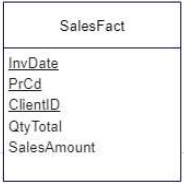

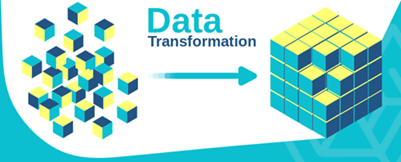

## inner merge

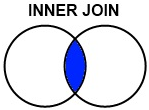

In [15]:
dfSm = dfSm.withColumnRenamed("InvoiceID","InvID")

In [16]:
dfS = dfSm.join(dfSd, dfSm.InvID == dfSd.InvoiceID)
print("Rows", dfS.count(),";\t Columns", len(dfS.columns))
dfS.show(5)

Rows 109104 ;	 Columns 7
+-----+----------+--------+---------+------+-----------+--------+
|InvID|   InvDate|ClientID|InvoiceID|ItemID|RetailPrice|Quantity|
+-----+----------+--------+---------+------+-----------+--------+
|  146|2011-11-02|      46|      146| 31639|       20.0|       6|
|  146|2011-11-02|      46|      146| 31650|       20.0|       6|
|  146|2011-11-02|      46|      146| 31655|       20.0|       6|
|  146|2011-11-02|      46|      146| 31659|       20.0|       6|
|  147|2011-11-02|      46|      147| 31736|       20.0|      12|
+-----+----------+--------+---------+------+-----------+--------+
only showing top 5 rows



In [17]:
dfS = dfS.drop(dfS.InvID)
dfS.show(5)

+----------+--------+---------+------+-----------+--------+
|   InvDate|ClientID|InvoiceID|ItemID|RetailPrice|Quantity|
+----------+--------+---------+------+-----------+--------+
|2011-11-02|      46|      146| 31639|       20.0|       6|
|2011-11-02|      46|      146| 31650|       20.0|       6|
|2011-11-02|      46|      146| 31655|       20.0|       6|
|2011-11-02|      46|      146| 31659|       20.0|       6|
|2011-11-02|      46|      147| 31736|       20.0|      12|
+----------+--------+---------+------+-----------+--------+
only showing top 5 rows



In [18]:
dfS = dfS.withColumnRenamed("ItemID","ItmID")

In [19]:
dfS = dfS.join(SrcItem, dfS.ItmID == SrcItem.ItemID)
dfS = dfS.drop(dfS.ItmID)
print("Rows", dfS.count(),";\t Columns", len(dfS.columns))
dfS.show(5)

Rows 109104 ;	 Columns 9
+----------+--------+---------+-----------+--------+------+---------------+----+----+
|   InvDate|ClientID|InvoiceID|RetailPrice|Quantity|ItemID|       ItemName|Unit|PrCd|
+----------+--------+---------+-----------+--------+------+---------------+----+----+
|2011-11-02|      46|      146|       20.0|       6| 31639|teez pata 30 gm|  gm| T02|
|2011-11-02|      46|      146|       20.0|       6| 31650|   jaifal 10 gm|  gm| J01|
|2011-11-02|      46|      146|       20.0|       6| 31655|koti mirch 50gm|  gm| L01|
|2011-11-02|      46|      146|       20.0|       6| 31659|sago dana 80 gm|  gm| S01|
|2011-11-02|      46|      147|       20.0|      12| 31736|    badam 16 gm|  gm| B02|
+----------+--------+---------+-----------+--------+------+---------------+----+----+
only showing top 5 rows



In [20]:
dfF = dfS[['InvDate', 'ClientID', 'PrCd', 'RetailPrice', 'Quantity']]
print("Rows", dfF.count(),";\t Columns", len(dfF.columns))
dfF.show(5)

Rows 109104 ;	 Columns 5
+----------+--------+----+-----------+--------+
|   InvDate|ClientID|PrCd|RetailPrice|Quantity|
+----------+--------+----+-----------+--------+
|2011-11-02|      46| T02|       20.0|       6|
|2011-11-02|      46| J01|       20.0|       6|
|2011-11-02|      46| L01|       20.0|       6|
|2011-11-02|      46| S01|       20.0|       6|
|2011-11-02|      46| B02|       20.0|      12|
+----------+--------+----+-----------+--------+
only showing top 5 rows



In [21]:
dfF = dfF.select('InvDate', 'ClientID', 'PrCd', 'RetailPrice', 'Quantity').dropDuplicates()
print("Rows", dfF.count(),";\t Columns", len(dfF.columns))
dfF.show(5)

Rows 104465 ;	 Columns 5
+----------+--------+----+-----------+--------+
|   InvDate|ClientID|PrCd|RetailPrice|Quantity|
+----------+--------+----+-----------+--------+
|2011-11-03|      41| J01|       20.0|       6|
|2011-11-05|      96| T01|       20.0|       6|
|2011-11-05|     130| A06|      160.0|      12|
|2011-11-05|     138| D02|       15.0|       6|
|2011-11-14|     155| P09|       30.0|       6|
+----------+--------+----+-----------+--------+
only showing top 5 rows



In [22]:
dfF = dfF.withColumn('SalesAmt', dfF.RetailPrice * dfF.Quantity)
dfF = dfF.drop(dfF.RetailPrice)
dfF.show(5)

+----------+--------+----+--------+--------+
|   InvDate|ClientID|PrCd|Quantity|SalesAmt|
+----------+--------+----+--------+--------+
|2011-11-03|      41| J01|       6|   120.0|
|2011-11-05|      96| T01|       6|   120.0|
|2011-11-05|     130| A06|      12|  1920.0|
|2011-11-05|     138| D02|       6|    90.0|
|2011-11-14|     155| P09|       6|   180.0|
+----------+--------+----+--------+--------+
only showing top 5 rows



In [23]:
dfF = dfF.groupBy(['InvDate', 'ClientID', 'PrCd']).agg({'Quantity': 'sum', 'SalesAmt': 'sum'})
print("Rows", dfF.count(),";\t Columns", len(dfF.columns))
dfF.show(5)

Rows 88900 ;	 Columns 5
+----------+--------+----+-------------+-------------+
|   InvDate|ClientID|PrCd|sum(SalesAmt)|sum(Quantity)|
+----------+--------+----+-------------+-------------+
|2012-02-13|     105| B02|        120.0|            6|
|2012-03-04|     531| P02|       -720.0|          -36|
|2012-08-18|     177| B02|       1320.0|           12|
|2011-11-18|     194| A06|        640.0|            4|
|2012-05-22|     128| L01|        300.0|           12|
+----------+--------+----+-------------+-------------+
only showing top 5 rows



In [24]:
dfF = dfF.withColumnRenamed("sum(SalesAmt)","SalesAmount").withColumnRenamed("sum(Quantity)", "QtyTotal")
dfF.printSchema()

root
 |-- InvDate: date (nullable = true)
 |-- ClientID: integer (nullable = true)
 |-- PrCd: string (nullable = true)
 |-- SalesAmount: double (nullable = true)
 |-- QtyTotal: long (nullable = true)



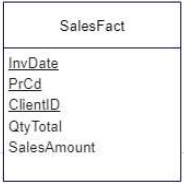

In [25]:
dfDt = dfF.select('InvDate').dropDuplicates()
print("Rows", dfDt.count(),";\t Columns", len(dfDt.columns))
dfDt.show(5)

Rows 405 ;	 Columns 1
+----------+
|   InvDate|
+----------+
|2012-10-06|
|2012-04-17|
|2013-01-22|
|2012-07-17|
|2011-11-18|
+----------+
only showing top 5 rows



In [26]:
from pyspark.sql.functions import year, quarter, month, dayofmonth, dayofyear, weekofyear

In [27]:
dfDt = dfDt.select(dfDt.InvDate, year(dfDt.InvDate).alias('Year'),\
                    quarter(dfDt.InvDate).alias('Quarter'), \
                    month(dfDt.InvDate).alias('Month'), \
                    dayofmonth(dfDt.InvDate).alias('DyMnth'), \
                    dayofyear(dfDt.InvDate).alias('DyYr'), \
                    weekofyear(dfDt.InvDate).alias('WkYr'))
dfDt.show(5)

+----------+----+-------+-----+------+----+----+
|   InvDate|Year|Quarter|Month|DyMnth|DyYr|WkYr|
+----------+----+-------+-----+------+----+----+
|2012-10-06|2012|      4|   10|     6| 280|  40|
|2012-04-17|2012|      2|    4|    17| 108|  16|
|2013-01-22|2013|      1|    1|    22|  22|   4|
|2012-07-17|2012|      3|    7|    17| 199|  29|
|2011-11-18|2011|      4|   11|    18| 322|  46|
+----------+----+-------+-----+------+----+----+
only showing top 5 rows



In [28]:
dfDt.printSchema()

root
 |-- InvDate: date (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Quarter: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- DyMnth: integer (nullable = true)
 |-- DyYr: integer (nullable = true)
 |-- WkYr: integer (nullable = true)

